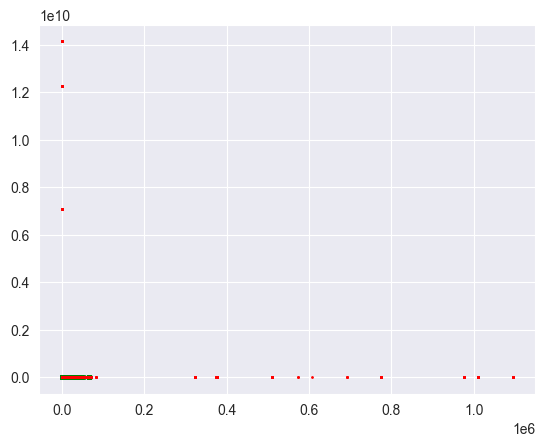

In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np


DATA_SETS = ["precomputed_labeled-10", "precomputed_labeled-20", "precomputed_labeled-30", "precomputed_labeled-40",
             "precomputed_labeled-50"]


def get_trainings_data(values):
    dimension_two = values[2]
    dimension_one = values[1]
    dimension_zero = values[0]

    feature_vec = []

    for x in dimension_two:
        # print(x[1] - x[0], "dim two")
        if x[1] - x[0] > 70:
            feature_vec.append(x[0])
            feature_vec.append(x[1])

    for x in dimension_one:
        # print(x[1] - x[0], "dim one")
        if x[1] - x[0] > 70:
            feature_vec.append(x[0])
            feature_vec.append(x[1])

    i = -1
    while len(feature_vec) < 20 and -i <= len(dimension_zero):
        # print(dimension_zero[i][1] - dimension_zero[i][0], "dim zero")
        if dimension_zero[i][1] - dimension_zero[i][0] > 70:
            feature_vec.append(dimension_zero[i][0])
            feature_vec.append(dimension_zero[i][1])
            i -= 1

    return feature_vec


with open('precomputed_labeled-30', 'rb+') as f:
    DATA = pickle.load(f)

figures, axis = plt.subplots()

points_normal = list(filter(lambda x: x[1] == 'benign', DATA))
points_anormal = list(filter(lambda x: x[1] != 'benign', DATA))

p_n_x = []
p_n_y = []

p_a_x = []
p_a_y = []

for (p, label) in points_normal:
    for k in p.keys():
        for j in p[k]:
            p_n_x.append(j[0])
            p_n_y.append(j[1])

for (p, label) in points_anormal:
    for k in p.keys():
        for j in p[k]:
            p_a_x.append(j[0])
            p_a_y.append(j[1])

plt.scatter(p_n_x, p_n_y, color="green", s=5)
plt.scatter(p_a_x, p_a_y, color="red", s=1)




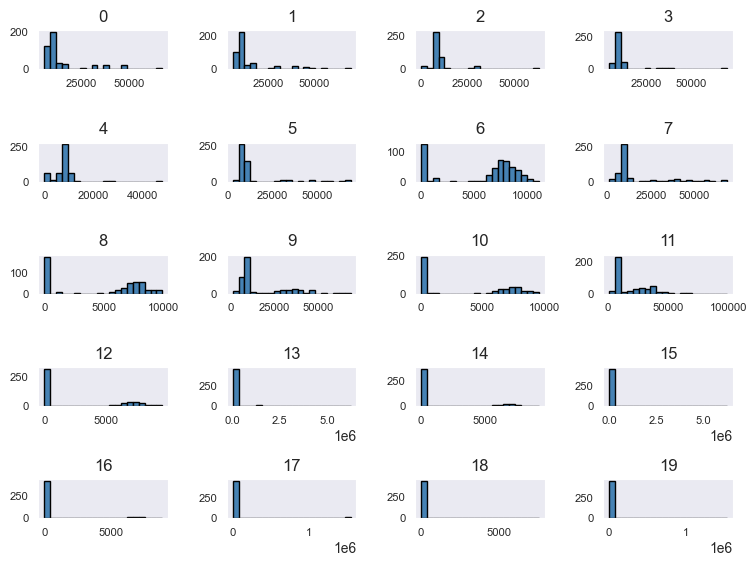

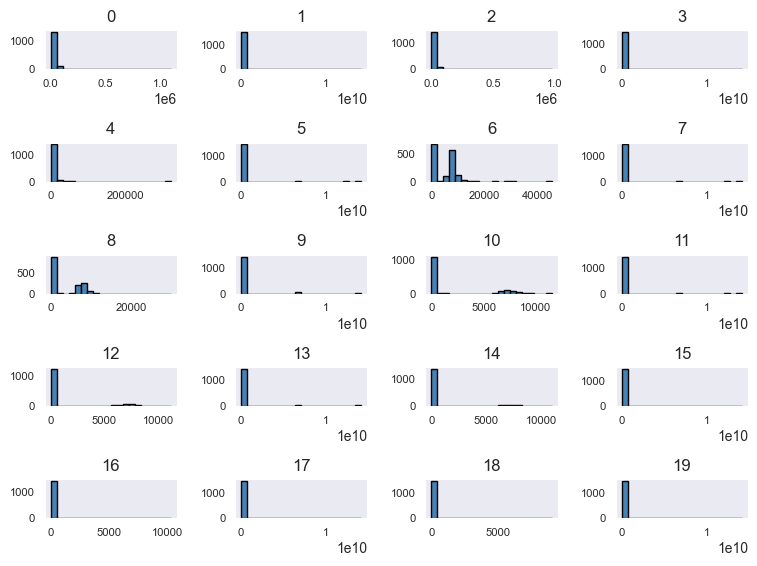

In [3]:
trainings_data_normal = []
trainings_data_anormal = []

for (data, label) in points_normal:
    t = get_trainings_data(data)
    if len(t) == 20:
        trainings_data_normal.append(t)

for (data, label) in points_anormal:
    t = get_trainings_data(data)
    if len(t) == 20:
        trainings_data_anormal.append(t)

df_normal = pandas.DataFrame(trainings_data_normal)
df_anormal = pandas.DataFrame(trainings_data_anormal)

df_normal.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
               xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
df_anormal.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
                xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

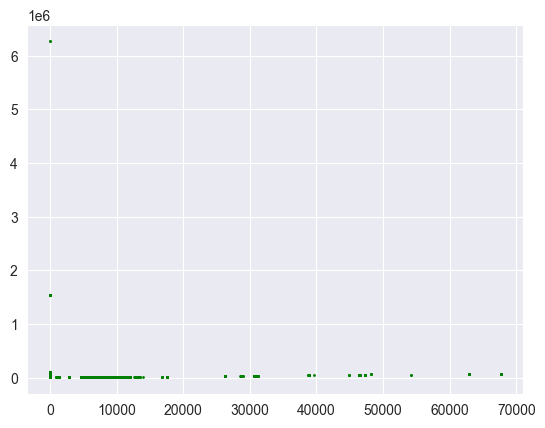

In [10]:
lifetimes_x_normal = []
lifetimes_y_normal = []
lifetimes_x_anormal = []
lifetimes_y_anormal = []

for vec in trainings_data_normal:
    for i in range(0, len(vec), 2):
        lifetimes_x_normal.append(vec[i])
        lifetimes_y_normal.append(vec[i+1])

for vec in trainings_data_anormal:
    for i in range(0, len(vec), 2):
        lifetimes_x_anormal.append(vec[i])
        lifetimes_y_anormal.append(vec[i+1])

plt.scatter(lifetimes_x_normal, lifetimes_y_normal, color="green", s=1)

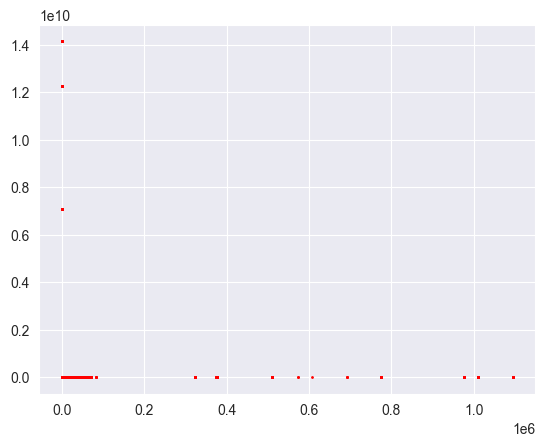

In [9]:
plt.scatter(lifetimes_x_anormal, lifetimes_y_anormal, color="red", s=1)

         tsne_1     tsne_2    label
0    -39.523308  -1.896391   benign
1    -29.853693  24.974659   benign
2    -48.290924  -5.402807   benign
3    -48.311653  -5.377697   benign
4    -23.205976 -34.154598   benign
...         ...        ...      ...
1977 -23.769476  -5.124690  malware
1978 -23.775763  -5.121410  malware
1979 -23.756006  -5.025199  malware
1980 -24.377880  -1.012487  malware
1981 -24.378374  -1.012237  malware

[1982 rows x 3 columns]


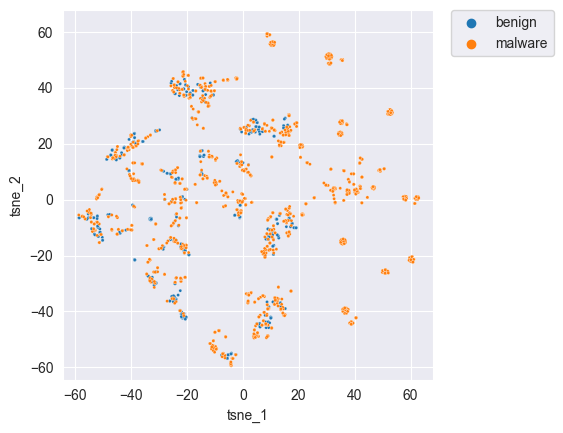

In [5]:
n_components = 2
tsne = TSNE(n_components)
all = trainings_data_normal + trainings_data_anormal
all = np.array(all)
labels = ["benign"] * len(trainings_data_normal)  + ["malware"] * len(trainings_data_anormal)
tsne_result = tsne.fit_transform(all)
tsne_result_df = pandas.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1],'label': labels})
print(tsne_result_df)
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=5)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


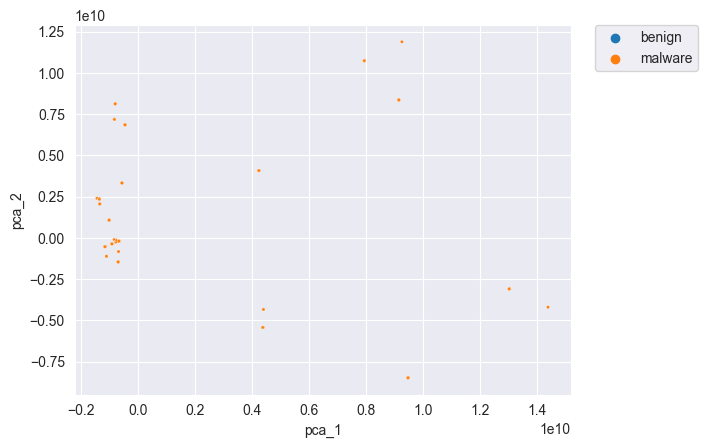

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(all)
#principalComponents = principalComponents[:len(trainings_data_normal)]
#print(principalComponents)
#label = labels[:len(trainings_data_normal)]
lim = (principalComponents.min()-5, principalComponents.max()+5)
principalDf = pandas.DataFrame({'pca_1': principalComponents[:,0], 'pca_2': principalComponents[:,1],'label': labels[:]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2',hue='label', data=principalDf, ax=ax,s=5)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)